#### [Chapter 3](https://github.com/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb)

#### **Random Networks**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git" -q

A random network consists of N nodes where each node pair is connected with probability p.
To construct a random network we follow these steps:
1) Start with N isolated nodes.
2) Select a node pair and generate a random number between 0 and 1. If the number exceeds p, connect the selected node pair with a link, otherwise leave them disconnected.
3) Repeat step (2) for each of the N(N-1)/2 node pairs.


In [1]:
import random
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from netsci.plot import plot_graph

In [2]:
LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)


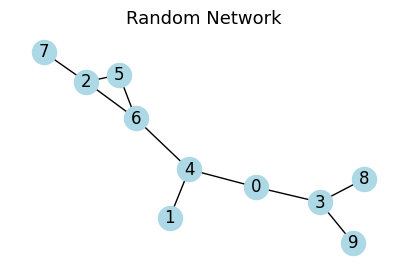

In [3]:

def create_random_network(N, p):
    G = nx.Graph()  # Initialize an empty graph
    G.add_nodes_from(range(N))  # Add N isolated nodes

    # Iterate through each possible node pair
    for i in range(N):
        for j in range(i + 1, N):
            if random.random() <= p:  # Generate a random number and compare it with p
                G.add_edge(i, j)  # Connect the nodes if the condition is met

    return G

# Example usage:
N = 10  # Number of nodes
p = 0.3  # Probability of edge creation

seed=2
random.seed(seed)
np.random.seed(seed)

random_network = create_random_network(N, p)
plot_graph(random_network, seed=2, figsize=(5, 3), title="Random Network")

Other option would be to use the `nx.gnp_random_graph` function from NetworkX, which generates random graphs with a given number of nodes and a given probability of edge creation.

```python
G = nx.gnp_random_graph(N, p)
```


#### Binimial distribution

Degree distribution in a random network follows a binomial distribution.

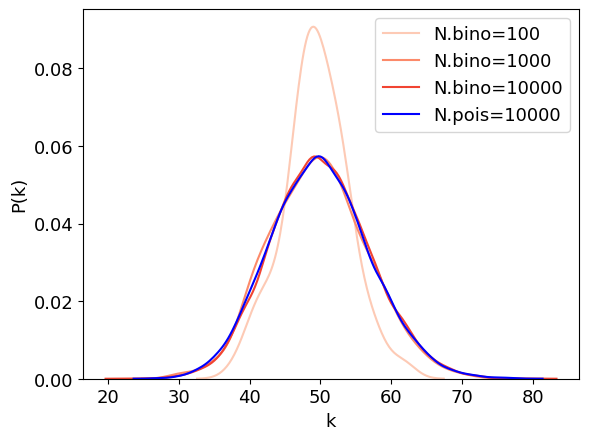

In [4]:
# make a random graph with N nodes and average degree of k
np.random.seed(2)

num_nodes = [100, 1000, 10000]
average_degree = 50
lambd = 50
colors1 = plt.cm.Reds(np.linspace(0.2, 0.6, len(num_nodes)))

for i in range(len(num_nodes)):
    probability = average_degree / num_nodes[i]
    graph_b = nx.gnp_random_graph(num_nodes[i], probability)
    degrees = [d for n, d in graph_b.degree()]
    sns.kdeplot(degrees, fill=False, label=f"N.bino={num_nodes[i]}", color=colors1[i])

s = np.random.poisson(lambd, num_nodes[-1])
sns.kdeplot(s, fill=False, label=f"N.pois={num_nodes[i]}", color='b')

plt.xlabel("k")
plt.ylabel("P(k)")
plt.legend();

#### The evolution of a random network

Connected Components:
Component 1: Size 1
Component 2: Size 1
Component 3: Size 18


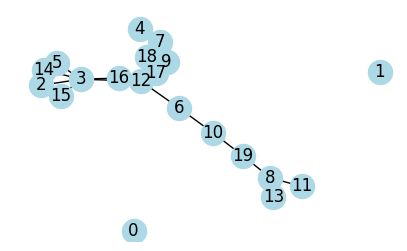

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Generate a random graph (Erdős-Rényi model)
n = 20  # number of nodes
p = 0.12  # probability of edge creation
G = nx.erdos_renyi_graph(n, p)

# Step 2: Find all connected components
connected_components = list(nx.connected_components(G))

# Step 3: Calculate the size of each connected component
component_sizes = [len(component) for component in connected_components]

# Display the graph and component sizes
print("Connected Components:")
for i, component in enumerate(connected_components):
    print(f"Component {i + 1}: Size {len(component)}")

# Optionally, visualize the graph
plot_graph(G, seed=2, figsize=(5, 3))

Plotting the size of giant connected component vs average degree

N=10000, Ln(N)= 9.210340371976182
average k =      0.100, giant_component_size=         4
average k =      0.500, giant_component_size=        17
average k =      0.900, giant_component_size=       126
average k =      1.000, giant_component_size=       300
average k =      1.100, giant_component_size=      1825
average k =      2.001, giant_component_size=      7834
average k =      2.902, giant_component_size=      9352
average k =      3.803, giant_component_size=      9768
average k =      4.705, giant_component_size=      9905
average k =      5.606, giant_component_size=      9957
average k =      6.507, giant_component_size=      9986
average k =      7.408, giant_component_size=      9996
average k =      8.309, giant_component_size=      9999
average k =      9.210, giant_component_size=     10000


Text(0, 0.5, '$N_G / N$')

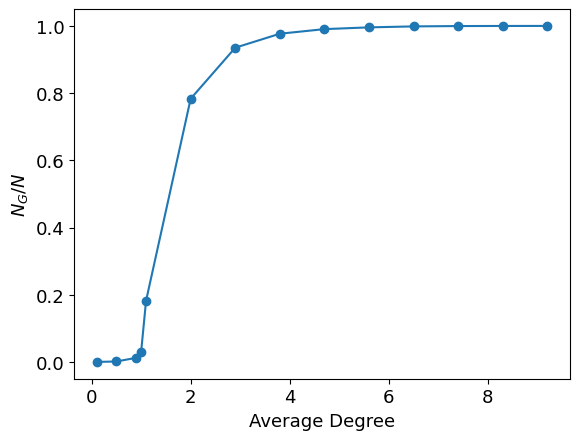

In [6]:
N = int(1e4)
print(f"N={N}, Ln(N)= {np.log(N)}")
k_avg = [.1, 0.5, 0.9, 1.0] + np.linspace(1.1, np.log(N), 10).tolist()
giant_component_sizes = []
for i in range(len(k_avg)):
    p = k_avg[i] / N 
    G = nx.erdos_renyi_graph(N, p)
    connected_components = list(nx.connected_components(G))
    component_sizes = [len(component) for component in connected_components]
    giant_component_size = max(component_sizes)
    giant_component_sizes.append(giant_component_size)
    
    print(f"average k = {k_avg[i]:10.3f}, giant_component_size={giant_component_size:10d}")
    
giant_component_sizes = np.array(giant_component_sizes)/N
plt.plot(k_avg, giant_component_sizes, marker='o', label='Giant Component Size')
plt.xlabel(r'Average Degree')
plt.ylabel(r'$N_G / N$');

#### Degree distribution of real networks

In [3]:
from netsci.utils import load_sample_graph, show_sample_graphs
from netsci.analysis import graph_info

graphs = show_sample_graphs()
graphs.keys()

dict_keys(['cit-HepPh', 'web-Stanford'])

In [4]:
G_hp = load_sample_graph('cit-HepPh')
graph_info(G_hp)

Successfully loaded cit-HepPh
Paper citation network of Arxiv High Energy Physics category
Graph information
Directed                                :                 True
Number of nodes                         :                34546
Number of edges                         :               421578
Average degree                          :              24.4068
Connectivity                            :         disconnected


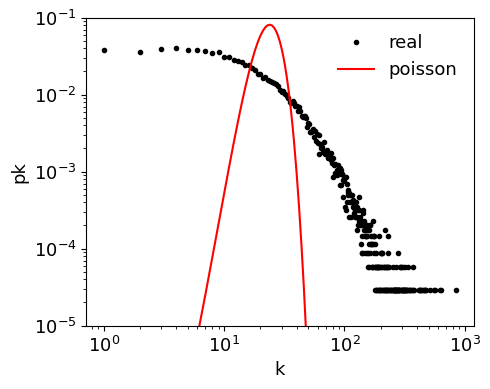

In [30]:
# plot pk versus k 

from collections import Counter
degrees = [G_hp.degree(n) for n in G_hp.nodes()]
degree_count = Counter(degrees)
k, pk = zip(*degree_count.items())
k = np.array(k)
pk = np.array(pk)/sum(pk)

plt.figure(figsize=(5,4))
plt.loglog(k, pk, 'k.', label='real')
plt.xlabel("k")
plt.ylabel("pk");

# add poisson distribution to graph

from scipy.stats import poisson

k = np.arange(0, max(degrees)+1)
pk_poisson = poisson.pmf(k, np.mean(degrees))
plt.loglog(k, pk_poisson, 'r', label='poisson')
plt.ylim([1e-5, 1e-1])
plt.legend(frameon=False);


#### Clustering coefficient

The local clustering coefficient of a random network is

$$
C_i = p= \frac{⟨k⟩}{N}
$$

To analyze the dependence of the average path length $d(p)$ and the clustering coefficient $\langle C(p) \rangle$ on the rewiring parameter $p$ for a small-world network, you can use the Watts-Strogatz model. This model begins with a regular lattice and introduces randomness by rewiring each edge with probability $p$. Here's a step-by-step guide on how to perform this analysis:

1. **Generate a regular lattice**: Create a regular ring lattice with $N$ nodes where each node is connected to its $k$ nearest neighbors.

2. **Rewire edges**: For each edge in the lattice, rewire it with probability $p$. This involves replacing the existing edge with a new edge that connects the node to a randomly chosen node in the network.

3. **Compute $d(p)$ and $\langle C(p) \rangle$**:
   - $d(p)$ is the average shortest path length between all pairs of nodes in the network.
   - $\langle C(p) \rangle$ is the average clustering coefficient of all nodes in the network.

4. **Normalize by $d(0)$ and $\langle C(0) \rangle$**:
   - $d(0)$ is the average path length of the regular lattice (when $p=0$).
   - $\langle C(0) \rangle$ is the average clustering coefficient of the regular lattice (when $p=0$).

5. **Plot the results**: Plot $d(p)/d(0)$ and $\langle C(p) \rangle / \langle C(0) \rangle$ as functions of $p$ on a log scale to observe the small-world phenomenon.

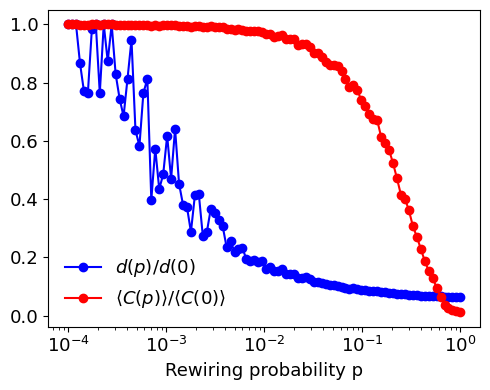

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of nodes
k = 10    # Each node is connected to k nearest neighbors in ring topology
p_values = np.logspace(-4, 0, num=100)  # Rewiring probabilities

# Initialize lists to store results
average_path_lengths = []
clustering_coefficients = []

# Generate the initial regular lattice
G0 = nx.watts_strogatz_graph(N, k, 0)
d0 = nx.average_shortest_path_length(G0)
C0 = nx.average_clustering(G0)

for p in p_values:
    G = nx.watts_strogatz_graph(N, k, p)
    d = nx.average_shortest_path_length(G)
    C = nx.average_clustering(G)
    average_path_lengths.append(d / d0)
    clustering_coefficients.append(C / C0)

# Plotting
plt.figure(figsize=(5, 4))

# Average path length plot
plt.plot(p_values, average_path_lengths, marker='o', linestyle='-', color='blue', label=r"$d(p)/d(0)$")

# Clustering coefficient plot
plt.plot(p_values, clustering_coefficients, marker='o', linestyle='-', color='red', label=r"$\langle C(p) \rangle / \langle C(0) \rangle$")
plt.xscale('log')
plt.xlabel('Rewiring probability p')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()
